<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/timeseries-PREDICT_CURRENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict value of currency "GBP" from currency"BRL" where the "BRL" value is the average value of the currency "BRL"#


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_vQF2i5ubKmHQMBqoTwsu6AlevWsQtTD/edit#gid=790744269')
data.head(3)

ParserError: ignored

# New Section

In [ ]:
'''country = "India"
data = data[data['location']==country]'''
data = data.dropna(inplace=True)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date',ascending=True,inplace=True)
data['Date'].min(), data['Date'].max()

TypeError: ignored

TypeError: ignored

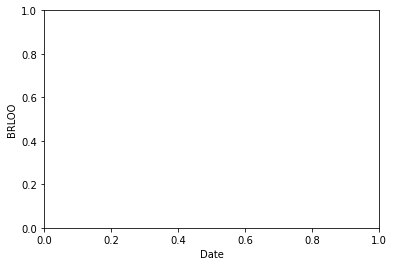

In [ ]:
plt.xlabel('Date')
plt.ylabel('BRLOO')
plt.plot(data['BRL'])

In [ ]:
plt.xlabel('Date')
plt.ylabel('GBPSS')
plt.plot(data['Date'],data['GBP'])

In [ ]:
rolling_mean5 = data['BRL'].rolling(window = 5).mean()
rolling_mean10 = data['BRL'].rolling(window = 10).mean()
rolling_mean15 = data['BRL'].rolling(window = 15).mean()
rolling_mean20 = data['BRL'].rolling(window = 20).mean()

plt.plot(data['Date'],data['BRL'], color = 'blue', label = 'Original')

plt.plot(data['Date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['Date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['Date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['Date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.show()

In [ ]:
rolling_mean5 = data['GBP'].rolling(window = 5).mean()
rolling_mean10 = data['GBP'].rolling(window = 10).mean()
rolling_mean15 = data['GBP'].rolling(window = 15).mean()
rolling_mean20 = data['GBP'].rolling(window = 20).mean()

plt.plot(data['Date'],data['GBP'], color = 'blue', label = 'Original')

plt.plot(data['Date'],rolling_mean5, color = 'red', label = 'Rolling 5 day mean')
plt.plot(data['Date'],rolling_mean10, color = 'black', label = 'Rolling 10 day mean')
plt.plot(data['Date'],rolling_mean15, color = 'orange', label = 'Rolling 15 day mean')
plt.plot(data['Date'],rolling_mean20, color = 'green', label = 'Rolling 20 day mean')

plt.legend(loc = 'best')
plt.title('Moving Average')

plt.show()

In [ ]:
data['moving_avg_5day'] = rolling_mean5
data['moving_avg_10day'] = rolling_mean10
data['moving_avg_15day'] = rolling_mean15
data['moving_avg_20day'] = rolling_mean20
data.head()

In [ ]:
data.dropna(inplace=True)
data.tail()

In [ ]:
autocorrelation_plot(data['BRL'])
plt.show()

In [ ]:
autocorrelation_plot(data['GBP'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['BRL'].dropna(),lags=50,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['BRL'].dropna(),lags=50,ax=ax2)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['GBP'].dropna(),lags=50,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['GBP'].dropna(),lags=50,ax=ax2)

In [ ]:
data.BRL

AttributeError: ignored

In [ ]:
data.GBP

In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.BRL, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.GBP, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.BRL, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# 1,1,0 ARIMA Model
model = ARIMA(data.GBP, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
X = data['BRL'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#model_fit.forecast()
sqrt(mean_squared_error(predictions,test))

NameError: ignored

In [ ]:
index_future_dates = pd.date_range(start='2022-05-19', end='2022-06-19')
pred = model_fit.forecast(steps=30)
print(pred)

NameError: ignored

In [ ]:
X = data['GBP'].values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	# print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

TypeError: ignored

In [ ]:
model_fit.forecast()
pred = model_fit.forecast(steps=30)
print(pred)

NameError: ignored

In [ ]:
mae5day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['BRL'], testdf['moving_avg_20day'])

NameError: ignored

In [ ]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

NameError: ignored

In [ ]:
mae5day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_5day'])
mae10day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_10day'])
mae15day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_15day'])
mae20day = mean_absolute_error(testdf['GBP'], testdf['moving_avg_20day'])

NameError: ignored

In [ ]:
print(f'Mean absolute error from 5day moving average prediction: {mae5day}')
print(f'Mean absolute error from 10day moving average prediction: {mae10day}')
print(f'Mean absolute error from 15day moving average prediction: {mae15day}')
print(f'Mean absolute error from 20day moving average prediction: {mae20day}')

NameError: ignored